### Assignment 5

You will unzip the zip file manually in preparation for this assignment.

The link to the zip file is (you have already used it in your assignment 3):

https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip

After unzipping, You will have all files in one folder named "CollegeScorecard_Raw_Data" 

The folder contains the yearly data files from 1996 to 2017 school years.

Your Jupyter Notebook file should not be in the CollegeScorecard_Raw_Data folder. 

I suggest you create a new folder call "Assignment4" and place the Notebook file and the data folder under it.

Assignment4/
    - Jay.ipynb
    - CollegeScorecard_Raw_Data/
        - ...
        - 'MERGED1996_97_PP.csv',
        - 'MERGED2015_16_PP.csv',
        - ...
        - 'MERGED2017_18_PP.csv'


In [343]:
# <1> 
# Import libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#(Write code here)

In [344]:
# <2>
# Find out what files are in the folder and assign the list of files to a variable for later processing
# you would need to import a library call os which stands for operating system. so place that import statement in previous cell.
# # os library also has method getcwd() to get the current working directory. since your notebook and your data files are not in 
# the same folder, you want to make sure what is the current working folder and how to access a data file in a different folder
# display the current workin directory
#(Write code here)
os.getcwd()

'C:\\Users\\tnjok\\Downloads\\Assignments'

In [345]:
# <3> 
# os library has a method call listdir which generates a list of files in a directory/folder
# use this method to assign the contents of the data folder to a variable and display it
#(Write code here)
DataFolder = "./Data sets/CollegeScorecard_Raw_Data"
file_list=os.listdir(datafolder)
file_list
#file_names=os.listdir("CollegeScorecard_Raw_Data")
#Downloads/Assignments/Data sets/CollegeScorecard_Raw_Data

['.DS_Store',
 '.ipynb_checkpoints',
 'Crosswalks.zip',
 'data.yaml',
 'FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [346]:
# <4> 
# The folder contains a couple of files that are not the yearly data files
# write code to remove the unwanted files from the list (Note: not from the folder in your drive)
# hint: use pop or remove functions of a list. pop and remove work differently though.
csv_list=[]
for file in file_list:
    if file.endswith(".csv"):
        csv_list.append(file)
csv_list

#(Write code here)

['FieldOfStudyData1415_1516_PP.csv',
 'FieldOfStudyData1516_1617_PP.csv',
 'MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [347]:
csv_list=[]
for file in file_list:
    if file.startswith("MER"):
        csv_list.append(file)
csv_list

['MERGED1996_97_PP.csv',
 'MERGED1997_98_PP.csv',
 'MERGED1998_99_PP.csv',
 'MERGED1999_00_PP.csv',
 'MERGED2000_01_PP.csv',
 'MERGED2001_02_PP.csv',
 'MERGED2002_03_PP.csv',
 'MERGED2003_04_PP.csv',
 'MERGED2004_05_PP.csv',
 'MERGED2005_06_PP.csv',
 'MERGED2006_07_PP.csv',
 'MERGED2007_08_PP.csv',
 'MERGED2008_09_PP.csv',
 'MERGED2009_10_PP.csv',
 'MERGED2010_11_PP.csv',
 'MERGED2011_12_PP.csv',
 'MERGED2012_13_PP.csv',
 'MERGED2013_14_PP.csv',
 'MERGED2014_15_PP.csv',
 'MERGED2015_16_PP.csv',
 'MERGED2016_17_PP.csv',
 'MERGED2017_18_PP.csv',
 'MERGED2018_19_PP.csv']

In [348]:
# <5> 
# Now that you have a clean list of the yearly files, you want to loop through them
# and read them into a dataframe one at a time. You only load three columns: UNITID, ADM_RATE, and TUITIONFEE_IN
# You also want to add a new column call "YEAR" to differentiate the data frames from each other.
# You would use an empty list and append the yearly dataframes to the list.
# After all data files are loaded and appended to the list, you would use Pandas to concatenate them into a 
# new single data frame.
# Note: this exercise incorporates many techques we learned before
# - list (creating an empty, append an item to the list)
# - for loop 
# - read only the needed columns from a file (using usecols option)
# - add a new column to a data frame
# - concatenate multiple dataframes into a single one
# This exercise may appear a big challenging but it worths the effort. You will learn a lot and  love it. I promise.

columns_list=["UNITID","ADM_RATE","TUITIONFEE_IN"]
df_list=[]
for file in csv_list:
    df=pd.read_csv(DataFolder + "/" + file, usecols=columns_list)
    df["YEAR"]=file[6:10]
    df_list.append(df)
   # print('processing file:',csv_list)
    
df=pd.concat(df_list)
df

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,NaN,NaN,1996
1,100654,NaN,NaN,1996
2,100663,NaN,NaN,1996
3,100672,NaN,NaN,1996
4,100690,NaN,NaN,1996
...,...,...,...,...
6801,48511112,NaN,6120.0,2018
6802,48511113,NaN,6120.0,2018
6803,48616901,NaN,NaN,2018
6804,49005401,NaN,21420.0,2018


In [349]:
# <6> 
# explore the new dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)
#(Write code here)

In [350]:
df.info

<bound method DataFrame.info of         UNITID  ADM_RATE  TUITIONFEE_IN  YEAR
0       100636       NaN            NaN  1996
1       100654       NaN            NaN  1996
2       100663       NaN            NaN  1996
3       100672       NaN            NaN  1996
4       100690       NaN            NaN  1996
...        ...       ...            ...   ...
6801  48511112       NaN         6120.0  2018
6802  48511113       NaN         6120.0  2018
6803  48616901       NaN            NaN  2018
6804  49005401       NaN        21420.0  2018
6805  49146401       NaN            NaN  2018

[163331 rows x 4 columns]>

In [351]:
df.shape

(163331, 4)

In [352]:
df.head()

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,NaN,NaN,1996
1,100654,NaN,NaN,1996
2,100663,NaN,NaN,1996
3,100672,NaN,NaN,1996
4,100690,NaN,NaN,1996


In [353]:
df.tail()

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
6801,48511112,NaN,6120.0,2018
6802,48511113,NaN,6120.0,2018
6803,48616901,NaN,NaN,2018
6804,49005401,NaN,21420.0,2018
6805,49146401,NaN,NaN,2018


In [354]:
df.sample(10)

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
3875,210906,NaN,NaN,1998
5516,363217,NaN,NaN,1997
4181,238014,NaN,2890.0,2013
6757,454564,NaN,NaN,2009
7210,461236,NaN,5010.0,2011
5987,454874,NaN,NaN,2015
4527,240505,NaN,1668.0,2007
1211,146807,NaN,NaN,2005
737,133085,0.6192,17865.0,2014
750,132976,NaN,2884.0,2013


In [355]:
df.dtypes

UNITID             int64
ADM_RATE         float64
TUITIONFEE_IN    float64
YEAR              object
dtype: object

In [356]:
df.describe()

,UNITID,ADM_RATE,TUITIONFEE_IN
count,1.633310e+05,44911.000000,79194.000000
mean,9.432395e+05,0.692946,11665.505367
std,4.571721e+06,0.217062,9985.998016
min,1.006360e+05,0.000000,0.000000
25%,1.633380e+05,0.555000,3776.000000
50%,2.127800e+05,0.717500,9285.000000
75%,4.075680e+05,0.857100,16146.000000
max,4.914640e+07,1.000000,74787.000000


In [357]:
df.dropna()

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
1,100654,0.7505,4664.0,2001
2,100663,0.9098,3640.0,2001
4,100706,0.8381,3536.0,2001
6,100751,0.7948,3292.0,2001
10,100858,0.7594,3380.0,2001
...,...,...,...,...
6271,491710,0.5854,7850.0,2018
6281,491817,0.8056,11665.0,2018
6290,491914,0.3333,9050.0,2018
6307,492476,1.0000,6200.0,2018


In [358]:
df.columns

Index(['UNITID', 'ADM_RATE', 'TUITIONFEE_IN', 'YEAR'], dtype='object')

In [365]:
# <7>
# the dataframe contains 22 years of data of all U.S. colleges.
# let's just look at UMBC
# filte/query the dataframe to retrieve only rows that belong to UMBC
# save the UMNC data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.
#(Write code here)

#df_umbc=df[df["INSTNM"].str.contains("UNIVERSITY OF MARYLAND BALTIMORE COUNTY")]
#df_umbc

columns_list=["UNITID","ADM_RATE","TUITIONFEE_IN","INSTNM"]
New_list=[]
for file in csv_list:
    df1=pd.read_csv(DataFolder + "/" + file, usecols=columns_list)
    df1["YEAR"]=file[6:10]
    New_list.append(df1)
   # print('processing file:',csv_list)
    
df1=pd.concat(New_list)
df1

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
0,100636,Community College of the Air Force,NaN,NaN,1996
1,100654,Alabama A & M University,NaN,NaN,1996
2,100663,University of Alabama at Birmingham,NaN,NaN,1996
3,100672,ALABAMA AVIATION AND TECHNICAL COLLEGE,NaN,NaN,1996
4,100690,Amridge University,NaN,NaN,1996
...,...,...,...,...,...
6801,48511112,Georgia Military College - Dublin,NaN,6120.0,2018
6802,48511113,Georgia Military College - Eastman,NaN,6120.0,2018
6803,48616901,American College of Barbering - Florence,NaN,NaN,2018
6804,49005401,Health Career Institute- Lauderdale Lakes,NaN,21420.0,2018


In [366]:
df_umbc=df1[df1["INSTNM"].str.contains("University of Maryland")]
df_umbc

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
2149,163204,University of Maryland-University College,NaN,NaN,1996
2150,163259,University of Maryland Baltimore,NaN,NaN,1996
2151,163268,University of Maryland-Baltimore County,NaN,NaN,1996
2152,163286,University of Maryland-College Park,NaN,NaN,1996
2154,163338,University of Maryland Eastern Shore,NaN,NaN,1996
...,...,...,...,...,...
1413,163204,University of Maryland-University College,NaN,7416.0,2018
1414,163259,University of Maryland Baltimore,NaN,NaN,2018
1415,163268,University of Maryland-Baltimore County,0.5794,11778.0,2018
1416,163286,University of Maryland-College Park,0.4716,10595.0,2018


In [367]:
df_umbc=df1
UMBC=df1[df1["INSTNM"].str.contains("University of Maryland-Baltimore County")]
UMBC

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,NaN,NaN,1996
2049,163268,University of Maryland-Baltimore County,NaN,NaN,1997
1982,163268,University of Maryland-Baltimore County,NaN,NaN,1998
1955,163268,University of Maryland-Baltimore County,NaN,NaN,1999
1926,163268,University of Maryland-Baltimore County,NaN,5490.0,2000
1915,163268,University of Maryland-Baltimore County,0.6551,5910.0,2001
1893,163268,University of Maryland-Baltimore County,0.6327,6362.0,2002
1873,163268,University of Maryland-Baltimore County,0.5757,7388.0,2003
1830,163268,University of Maryland-Baltimore County,0.7014,8020.0,2004
1819,163268,University of Maryland-Baltimore County,0.7143,8520.0,2005


In [368]:
# <8>
# Explore this UMBC dataframe (# of observations, varibles, head, tail, sample, missing values, statistics,etc.)
#(Write code here)

In [369]:
UMBC =UMBC.fillna(0)
UMBC

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,0.0000,0.0,1996
2049,163268,University of Maryland-Baltimore County,0.0000,0.0,1997
1982,163268,University of Maryland-Baltimore County,0.0000,0.0,1998
1955,163268,University of Maryland-Baltimore County,0.0000,0.0,1999
1926,163268,University of Maryland-Baltimore County,0.0000,5490.0,2000
1915,163268,University of Maryland-Baltimore County,0.6551,5910.0,2001
1893,163268,University of Maryland-Baltimore County,0.6327,6362.0,2002
1873,163268,University of Maryland-Baltimore County,0.5757,7388.0,2003
1830,163268,University of Maryland-Baltimore County,0.7014,8020.0,2004
1819,163268,University of Maryland-Baltimore County,0.7143,8520.0,2005


In [370]:
UMBC.reset_index(drop=True)

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
0,163268,University of Maryland-Baltimore County,0.0000,0.0,1996
1,163268,University of Maryland-Baltimore County,0.0000,0.0,1997
2,163268,University of Maryland-Baltimore County,0.0000,0.0,1998
3,163268,University of Maryland-Baltimore County,0.0000,0.0,1999
4,163268,University of Maryland-Baltimore County,0.0000,5490.0,2000
5,163268,University of Maryland-Baltimore County,0.6551,5910.0,2001
6,163268,University of Maryland-Baltimore County,0.6327,6362.0,2002
7,163268,University of Maryland-Baltimore County,0.5757,7388.0,2003
8,163268,University of Maryland-Baltimore County,0.7014,8020.0,2004
9,163268,University of Maryland-Baltimore County,0.7143,8520.0,2005


In [371]:
UMBC.sort_values(["ADM_RATE","UNITID"], ascending=[True,False])

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,0.0000,0.0,1996
2049,163268,University of Maryland-Baltimore County,0.0000,0.0,1997
1982,163268,University of Maryland-Baltimore County,0.0000,0.0,1998
1955,163268,University of Maryland-Baltimore County,0.0000,0.0,1999
1926,163268,University of Maryland-Baltimore County,0.0000,5490.0,2000
1510,163268,University of Maryland-Baltimore County,0.5683,11264.0,2016
1873,163268,University of Maryland-Baltimore County,0.5757,7388.0,2003
1415,163268,University of Maryland-Baltimore County,0.5794,11778.0,2018
1555,163268,University of Maryland-Baltimore County,0.5942,11006.0,2015
1610,163268,University of Maryland-Baltimore County,0.5961,10384.0,2014


In [372]:
UMBC.dtypes

UNITID             int64
INSTNM            object
ADM_RATE         float64
TUITIONFEE_IN    float64
YEAR              object
dtype: object

In [373]:
UMBC["YEAR"]=UMBC["YEAR"].astype("float64")
UMBC

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,University of Maryland-Baltimore County,0.0000,0.0,1996.0
2049,163268,University of Maryland-Baltimore County,0.0000,0.0,1997.0
1982,163268,University of Maryland-Baltimore County,0.0000,0.0,1998.0
1955,163268,University of Maryland-Baltimore County,0.0000,0.0,1999.0
1926,163268,University of Maryland-Baltimore County,0.0000,5490.0,2000.0
1915,163268,University of Maryland-Baltimore County,0.6551,5910.0,2001.0
1893,163268,University of Maryland-Baltimore County,0.6327,6362.0,2002.0
1873,163268,University of Maryland-Baltimore County,0.5757,7388.0,2003.0
1830,163268,University of Maryland-Baltimore County,0.7014,8020.0,2004.0
1819,163268,University of Maryland-Baltimore County,0.7143,8520.0,2005.0


In [374]:
UMBC.dtypes

UNITID             int64
INSTNM            object
ADM_RATE         float64
TUITIONFEE_IN    float64
YEAR             float64
dtype: object

In [375]:
Uvar_categorical=UMBC.select_dtypes("object")
Uvar_categorical

,INSTNM
2151,University of Maryland-Baltimore County
2049,University of Maryland-Baltimore County
1982,University of Maryland-Baltimore County
1955,University of Maryland-Baltimore County
1926,University of Maryland-Baltimore County
1915,University of Maryland-Baltimore County
1893,University of Maryland-Baltimore County
1873,University of Maryland-Baltimore County
1830,University of Maryland-Baltimore County
1819,University of Maryland-Baltimore County


In [376]:
Uvar_numerical=UMBC.select_dtypes("number")
Uvar_numerical

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
2151,163268,0.0000,0.0,1996.0
2049,163268,0.0000,0.0,1997.0
1982,163268,0.0000,0.0,1998.0
1955,163268,0.0000,0.0,1999.0
1926,163268,0.0000,5490.0,2000.0
1915,163268,0.6551,5910.0,2001.0
1893,163268,0.6327,6362.0,2002.0
1873,163268,0.5757,7388.0,2003.0
1830,163268,0.7014,8020.0,2004.0
1819,163268,0.7143,8520.0,2005.0


In [377]:
UMBC.shape

(23, 5)

In [378]:
UMBC.describe()

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
count,23.0,23.000000,23.000000,23.00000
mean,163268.0,0.501413,7438.782609,2007.00000
std,0.0,0.274154,3860.898223,6.78233
min,163268.0,0.000000,0.000000,1996.00000
25%,163268.0,0.572000,6136.000000,2001.50000
50%,163268.0,0.603500,8708.000000,2007.00000
75%,163268.0,0.673950,9916.000000,2012.50000
max,163268.0,0.717400,11778.000000,2018.00000


In [379]:
UMBC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 2151 to 1415
Data columns (total 5 columns):
UNITID           23 non-null int64
INSTNM           23 non-null object
ADM_RATE         23 non-null float64
TUITIONFEE_IN    23 non-null float64
YEAR             23 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ KB


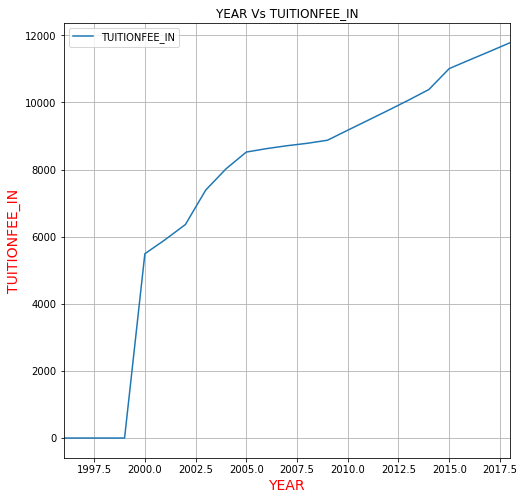

In [380]:
# <9> 
# Plot UMBC's in-state tution overtime from 1996 to 2017.

UMBC.plot.line(x="YEAR",y="TUITIONFEE_IN",figsize=(8,8))
plt.title("YEAR Vs TUITIONFEE_IN")
plt.xlabel("YEAR",color='red',fontsize=14)
plt.ylabel("TUITIONFEE_IN",color='red',fontsize=14)           
plt.grid()
plt.legend()
plt.show()

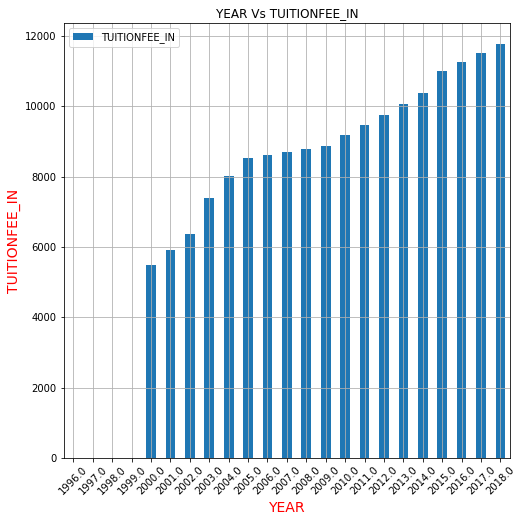

In [381]:
#fig,ax= plt.subplots(figsize=(8,8))
UMBC.plot.bar(x="YEAR",y="TUITIONFEE_IN",figsize=(8,8),rot=45)
plt.title("YEAR Vs TUITIONFEE_IN")
plt.xlabel("YEAR",color='red',fontsize=14)
plt.ylabel("TUITIONFEE_IN",color='red',fontsize=14)           
plt.grid()
plt.legend()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018636480DC8>]],
      dtype=object)

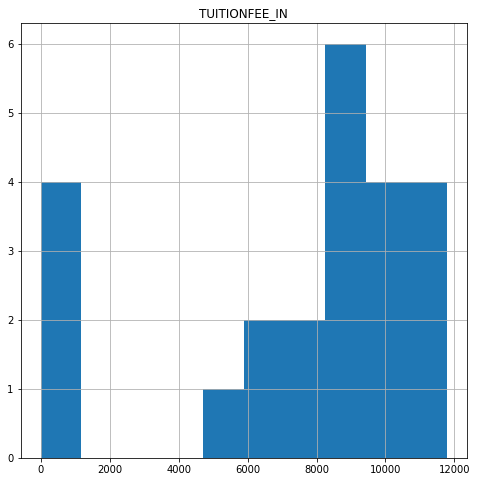

In [382]:
UMBC.hist("TUITIONFEE_IN",figsize=(8,8))

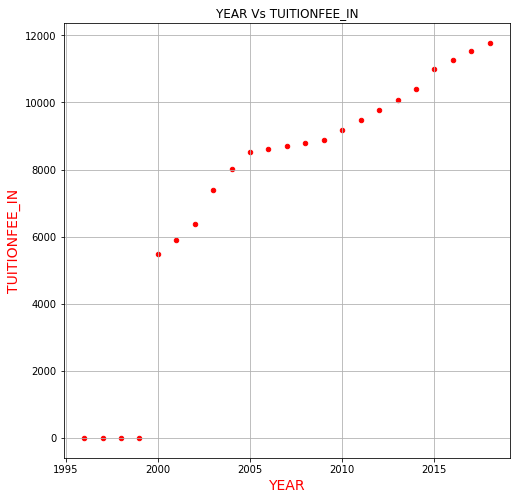

In [383]:
UMBC.plot.scatter(x="YEAR",y="TUITIONFEE_IN",figsize=(8,8),color="red") 
plt.title("YEAR Vs TUITIONFEE_IN")
plt.xlabel("YEAR",color='red',fontsize=14)
plt.ylabel("TUITIONFEE_IN",color='red',fontsize=14)
plt.grid()
plt.show()

In [384]:
# <10>
# go back to 5/6/7 and modify the code to look at Johns Hopskins University instead.
# (No code to write here, you just modify the previous cells)
JHU=df1[df1["INSTNM"].str.contains("Johns Hopkins University")]
JHU

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
2139,162928,Johns Hopkins University,NaN,NaN,1996
2039,162928,Johns Hopkins University,NaN,NaN,1997
1973,162928,Johns Hopkins University,NaN,NaN,1998
1946,162928,Johns Hopkins University,NaN,NaN,1999
1917,162928,Johns Hopkins University,NaN,24930.0,2000
1906,162928,Johns Hopkins University,0.3431,26210.0,2001
1884,162928,Johns Hopkins University,0.3506,27390.0,2002
1865,162928,Johns Hopkins University,0.3060,28730.0,2003
1823,162928,Johns Hopkins University,0.3071,30140.0,2004
1812,162928,Johns Hopkins University,0.3509,31620.0,2005


In [385]:
JHU["YEAR"]=JHU["YEAR"].astype("float64")
JHU

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
2139,162928,Johns Hopkins University,NaN,NaN,1996.0
2039,162928,Johns Hopkins University,NaN,NaN,1997.0
1973,162928,Johns Hopkins University,NaN,NaN,1998.0
1946,162928,Johns Hopkins University,NaN,NaN,1999.0
1917,162928,Johns Hopkins University,NaN,24930.0,2000.0
1906,162928,Johns Hopkins University,0.3431,26210.0,2001.0
1884,162928,Johns Hopkins University,0.3506,27390.0,2002.0
1865,162928,Johns Hopkins University,0.3060,28730.0,2003.0
1823,162928,Johns Hopkins University,0.3071,30140.0,2004.0
1812,162928,Johns Hopkins University,0.3509,31620.0,2005.0


In [386]:
JHU=JHU.fillna(0)
JHU

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
2139,162928,Johns Hopkins University,0.0000,0.0,1996.0
2039,162928,Johns Hopkins University,0.0000,0.0,1997.0
1973,162928,Johns Hopkins University,0.0000,0.0,1998.0
1946,162928,Johns Hopkins University,0.0000,0.0,1999.0
1917,162928,Johns Hopkins University,0.0000,24930.0,2000.0
1906,162928,Johns Hopkins University,0.3431,26210.0,2001.0
1884,162928,Johns Hopkins University,0.3506,27390.0,2002.0
1865,162928,Johns Hopkins University,0.3060,28730.0,2003.0
1823,162928,Johns Hopkins University,0.3071,30140.0,2004.0
1812,162928,Johns Hopkins University,0.3509,31620.0,2005.0


In [387]:
JHU.describe()

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
count,23.0,23.000000,23.000000,23.00000
mean,162928.0,0.181991,32155.652174,2007.00000
std,0.0,0.121471,17233.080458,6.78233
min,162928.0,0.000000,0.000000,1996.00000
25%,162928.0,0.120100,26800.000000,2001.50000
50%,162928.0,0.184300,35900.000000,2007.00000
75%,162928.0,0.278700,44430.000000,2012.50000
max,162928.0,0.350900,53740.000000,2018.00000


In [388]:
JHU=JHU.sort_values(["UNITID","TUITIONFEE_IN"],ascending=[False,True])
JHU= JHU.reset_index(drop=True)
JHU

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
0,162928,Johns Hopkins University,0.0000,0.0,1996.0
1,162928,Johns Hopkins University,0.0000,0.0,1997.0
2,162928,Johns Hopkins University,0.0000,0.0,1998.0
3,162928,Johns Hopkins University,0.0000,0.0,1999.0
4,162928,Johns Hopkins University,0.0000,24930.0,2000.0
5,162928,Johns Hopkins University,0.3431,26210.0,2001.0
6,162928,Johns Hopkins University,0.3506,27390.0,2002.0
7,162928,Johns Hopkins University,0.3060,28730.0,2003.0
8,162928,Johns Hopkins University,0.3071,30140.0,2004.0
9,162928,Johns Hopkins University,0.3509,31620.0,2005.0


In [389]:
JH_numeric=JHU.select_dtypes("number")
JH_numeric

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
0,162928,0.0000,0.0,1996.0
1,162928,0.0000,0.0,1997.0
2,162928,0.0000,0.0,1998.0
3,162928,0.0000,0.0,1999.0
4,162928,0.0000,24930.0,2000.0
5,162928,0.3431,26210.0,2001.0
6,162928,0.3506,27390.0,2002.0
7,162928,0.3060,28730.0,2003.0
8,162928,0.3071,30140.0,2004.0
9,162928,0.3509,31620.0,2005.0


In [390]:
JHU.tail()

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
18,162928,Johns Hopkins University,0.1608,47060.0,2014.0
19,162928,Johns Hopkins University,0.1412,48710.0,2015.0
20,162928,Johns Hopkins University,0.1284,50410.0,2016.0
21,162928,Johns Hopkins University,0.1254,52170.0,2017.0
22,162928,Johns Hopkins University,0.1148,53740.0,2018.0


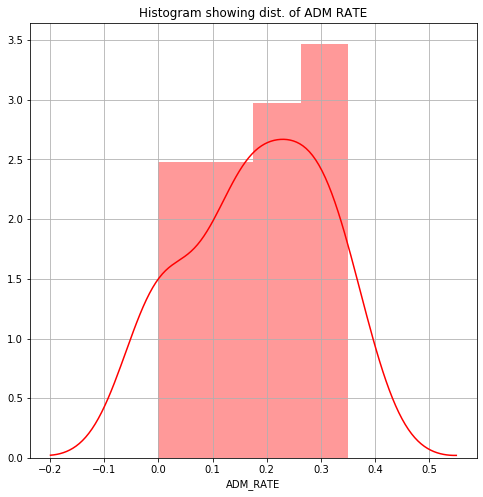

In [392]:
fig,ax=plt.subplots(figsize=(8,8))
sns.distplot(JHU["ADM_RATE"],color="red")
ax.set_title("Histogram showing dist. of ADM RATE")
plt.grid()

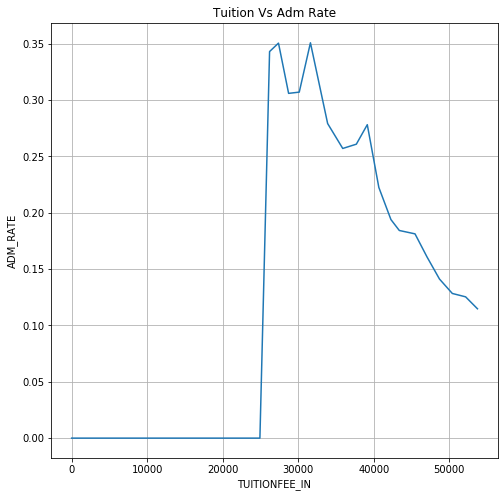

In [393]:
fig,ax=plt.subplots(figsize=(8,8))
sns.lineplot(x="TUITIONFEE_IN",y="ADM_RATE",data=JHU)
ax.set_title("Tuition Vs Adm Rate")
plt.grid()
plt.show()

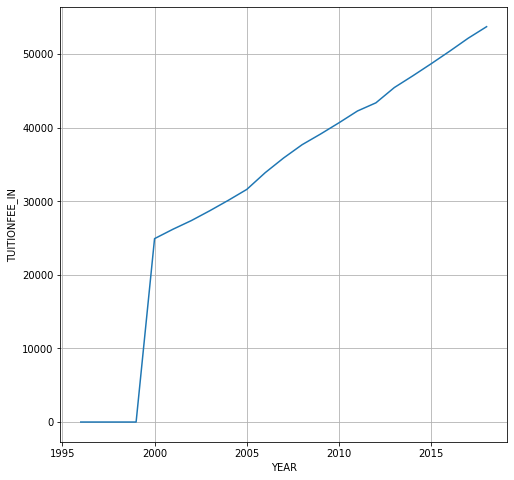

In [394]:
fig,ax=plt.subplots(figsize=(8,8))
sns.lineplot(x="YEAR",y="TUITIONFEE_IN",data=JHU)
plt.grid()
plt.show()

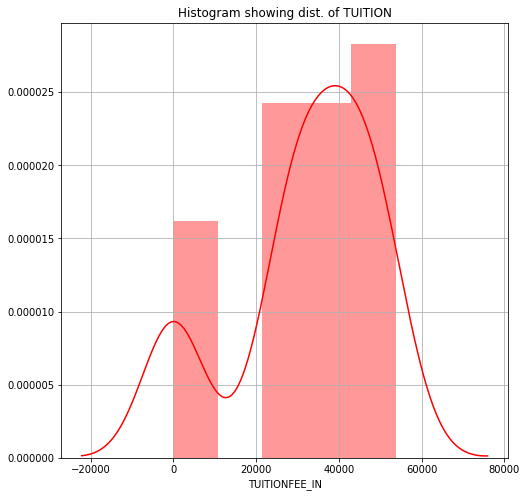

In [395]:
fig,ax=plt.subplots(figsize=(8,8))
sns.distplot(JHU["TUITIONFEE_IN"],color="red")
ax.set_title("Histogram showing dist. of TUITION")
log=True
plt.grid()

In [396]:
# <11> 
# Now, we like to compare UMBC and JHU
# filte/query the dataframe to retrieve only rows that belong to UMBC orJHU
# save the UMNC/JHU data to a new data frame. using a new variable 
# so that the old big data frame is still available for later use.

df_union= pd.concat([UMBC, JHU]).drop_duplicates()
df_union
df_union.reset_index(drop=True)

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
0,163268,University of Maryland-Baltimore County,0.0000,0.0,1996.0
1,163268,University of Maryland-Baltimore County,0.0000,0.0,1997.0
2,163268,University of Maryland-Baltimore County,0.0000,0.0,1998.0
3,163268,University of Maryland-Baltimore County,0.0000,0.0,1999.0
4,163268,University of Maryland-Baltimore County,0.0000,5490.0,2000.0
5,163268,University of Maryland-Baltimore County,0.6551,5910.0,2001.0
6,163268,University of Maryland-Baltimore County,0.6327,6362.0,2002.0
7,163268,University of Maryland-Baltimore County,0.5757,7388.0,2003.0
8,163268,University of Maryland-Baltimore County,0.7014,8020.0,2004.0
9,163268,University of Maryland-Baltimore County,0.7143,8520.0,2005.0


In [ ]:
# <12>
# Explore the new dataframe (#of observations, varibles, head, tail, sample, missing values, statistics,etc.)

In [397]:
df_union.shape

(46, 5)

In [398]:
df_union.describe()

,UNITID,ADM_RATE,TUITIONFEE_IN,YEAR
count,46.00000,46.000000,46.000000,46.000000
mean,163098.00000,0.341702,19797.217391,2007.000000
std,171.87851,0.264638,17567.080963,6.706547
min,162928.00000,0.000000,0.000000,1996.000000
25%,162928.00000,0.126150,7546.000000,2001.250000
50%,163098.00000,0.292600,10695.000000,2007.000000
75%,163268.00000,0.603150,35400.000000,2012.750000
max,163268.00000,0.717400,53740.000000,2018.000000


In [399]:
df_union.sample(10)

,UNITID,INSTNM,ADM_RATE,TUITIONFEE_IN,YEAR
3,162928,Johns Hopkins University,0.0000,0.0,1999.0
20,162928,Johns Hopkins University,0.1284,50410.0,2016.0
10,162928,Johns Hopkins University,0.2792,33900.0,2006.0
2151,163268,University of Maryland-Baltimore County,0.0000,0.0,1996.0
5,162928,Johns Hopkins University,0.3431,26210.0,2001.0
14,162928,Johns Hopkins University,0.2225,40680.0,2010.0
1555,163268,University of Maryland-Baltimore County,0.5942,11006.0,2015.0
4,162928,Johns Hopkins University,0.0000,24930.0,2000.0
9,162928,Johns Hopkins University,0.3509,31620.0,2005.0
1610,163268,University of Maryland-Baltimore County,0.5961,10384.0,2014.0


In [400]:
df_union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 2151 to 22
Data columns (total 5 columns):
UNITID           46 non-null int64
INSTNM           46 non-null object
ADM_RATE         46 non-null float64
TUITIONFEE_IN    46 non-null float64
YEAR             46 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.2+ KB


In [401]:
df_union["ADM_RATE"].unique()

array([0.    , 0.6551, 0.6327, 0.5757, 0.7014, 0.7143, 0.7153, 0.6895,
       0.7174, 0.689 , 0.6589, 0.6081, 0.6035, 0.6315, 0.5961, 0.5942,
       0.5683, 0.6021, 0.5794, 0.3431, 0.3506, 0.306 , 0.3071, 0.3509,
       0.2792, 0.2571, 0.2609, 0.2782, 0.2225, 0.194 , 0.1843, 0.1813,
       0.1608, 0.1412, 0.1284, 0.1254, 0.1148])

In [402]:
df_union.aggregate("sum")

UNITID                                                     7502508
INSTNM           University of Maryland-Baltimore CountyUnivers...
ADM_RATE                                                   15.7183
TUITIONFEE_IN                                               910672
YEAR                                                         92322
dtype: object

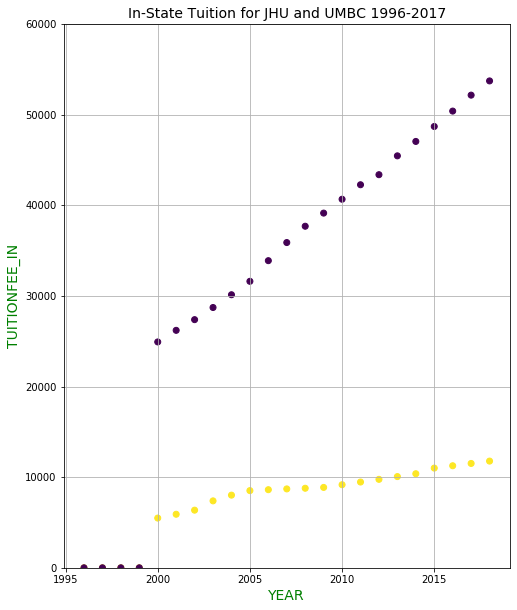

In [403]:
# <13>
# Plot the in-state tuition of both UMBC and JHU over the 22 years on the same plot
# This plot will help us compare the two universities.

UMJU=df_union
fig, ax = plt.subplots(figsize=(8,10))
ax.scatter('YEAR','TUITIONFEE_IN', c=UMJU['UNITID'],data=UMJU)
ax.set_title('In-State Tuition for JHU and UMBC 1996-2017', fontsize=14)
ax.set_xlabel('YEAR', fontsize=14,color="green")
ax.set_ylim([0,60000]) # This helps to ajust the scale.
ax.set_ylabel('TUITIONFEE_IN', fontsize=14,color="green")
ax.grid(True)

In [ ]:
# <14> 
# document your observation/conclusion of the plot (use the following Markdown cell)


#From the plot, we can see that the tution fee for both institutions has almost the same growth ratio between the Y-2000 to Y-2017.
# with JHU form about 25000 to 55000
# while UMBC form about 5000 to 11000.
# We have just a few values before Y-2000, This does not means that the tuition fee was 'Zero', rather the values were not reported.

#### Based on my observation of the plot,
#### blah, blah 
#### blah, blah
#### ...
#### blah, blah

In [ ]:
# The end.